# WordNet

In [1]:
# Ya instalamos paquetes NLTK usando nltk.download(). Uno de los paquetes fue WordNet.
# Documentación: https://www.nltk.org/howto/wordnet.html

from nltk.corpus import wordnet as wn

In [2]:
# Para conocer todos los synset de una palabra se usa
syn = wn.synsets('dog')
syn

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [3]:
# Obtener definiciones y ejemplos para una palabra (un synset en particular)
print( wn.synset('dog.n.01').definition() )

print( wn.synset('dog.n.01').examples() )

a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
['the dog barked all night']


In [13]:
# Incluye muchas definiciones
syn = wn.synsets("NLP")
print( syn[0].definition() )

syn = wn.synsets("Python")
print( syn[0].definition() )

the branch of information science that deals with natural language information
large Old World boas


<p> La función tiene un argumento <em>POS</em> opcional que le permite restringir la parte gramatical de la palabra. Las partes del discurso son: <code>NOUN, ADJ, VERB y ADV</code>. Un synset se identifica con un nombre de 3 partes de la forma: <code>word.pos.nn</code></p>

In [17]:
wn.synsets('dog', pos= wn.VERB)

[Synset('chase.v.01')]

In [18]:
# Obteniendo los lemmas
wn.synset('dog.n.01').lemmas()

[Lemma('dog.n.01.dog'),
 Lemma('dog.n.01.domestic_dog'),
 Lemma('dog.n.01.Canis_familiaris')]

In [19]:
[str(lemma.name()) for lemma in wn.synset('dog.n.01').lemmas()]

['dog', 'domestic_dog', 'Canis_familiaris']

In [22]:
import nltk
nltk.download('omw')

# WordNet permiten acceso a otras lenguas
sorted(wn.langs())

[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\luiso\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw.zip.


['als',
 'arb',
 'bul',
 'cat',
 'cmn',
 'dan',
 'ell',
 'eng',
 'eus',
 'fas',
 'fin',
 'fra',
 'glg',
 'heb',
 'hrv',
 'ind',
 'ita',
 'jpn',
 'nld',
 'nno',
 'nob',
 'pol',
 'por',
 'qcn',
 'slv',
 'spa',
 'swe',
 'tha',
 'zsm']

In [63]:
# Para hacer consultas sobre una palabra específica.
wn.synsets(b'auto'.decode('utf-8'), lang='spa')

[Synset('car.n.01'), Synset('decree.n.01'), Synset('mystery_play.n.01')]

In [28]:
# Sobre el sysnset devuelto se pueden hacer consultas
wn.synset('car.n.01').lemma_names('spa')

['auto', 'automóvil', 'carro', 'coche', 'máquina', 'turismo', 'vehículo']

In [31]:
sorted(wn.synset('dog.n.01').lemmas('spa'))

[Lemma('dog.n.01.can'), Lemma('dog.n.01.perro')]

In [38]:
# Para saber cuántos lemmas de sustantivos en español tiene wordnet
len( list( wn.all_lemma_names(pos='n', lang='spa') ))

28647

<ul>
    <li><b>Synset:</b> conjunto de sinónimos que comparten un significado común.</li>
    <li><b>Hiperónimos:</b> palabra cuyo significado engloba el de otra u otras. Es una manera más general de referirse a algo.</li>
    <li><b>Hipónimos:</b> son palabras cuyo significado es específico y acotado. Es una forma específica de referirse a un concepto. Los hipónimos se pueden englobar en un hiperónimo, es decir, palabras que engloban un concepto más amplio.</li>
    <li><b>Holónimo:</b> palabra cuyo significado mantiene, respecto del de otra, la misma relación que el todo respecto de la parte.</li>
</ul>

Ejemplos:
<ul>
    <li>flor (hiperónimo), rosa, jazmín, tulipán (hipónimos)</li>
    <li>deporte (hiperónimo), fútbol, tenis, montañismo, natación (hipónimos)</li>
    <li>Flor es el holónimo de cáliz, corola, pistilo o estambre</li>
</ul>

In [39]:
# Hiperónimos
dog = wn.synset('dog.n.01')
dog.hypernyms()

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [40]:
# Hipónimos
dog.hyponyms()

[Synset('basenji.n.01'),
 Synset('corgi.n.01'),
 Synset('cur.n.01'),
 Synset('dalmatian.n.02'),
 Synset('great_pyrenees.n.01'),
 Synset('griffon.n.02'),
 Synset('hunting_dog.n.01'),
 Synset('lapdog.n.01'),
 Synset('leonberg.n.01'),
 Synset('mexican_hairless.n.01'),
 Synset('newfoundland.n.01'),
 Synset('pooch.n.01'),
 Synset('poodle.n.01'),
 Synset('pug.n.01'),
 Synset('puppy.n.01'),
 Synset('spitz.n.01'),
 Synset('toy_dog.n.01'),
 Synset('working_dog.n.01')]

In [41]:
# Holónimos
dog.member_holonyms()

[Synset('canis.n.01'), Synset('pack.n.06')]

In [42]:
# Obtiene los hiperónimos más importantes de este synset 
dog.root_hypernyms()

[Synset('entity.n.01')]

In [43]:
# lowest_common_hypernyms() método utilizado para localizar el hiperónimo más bajo que comparten dos palabras determinadas 
wn.synset('dog.n.01').lowest_common_hypernyms(wn.synset('cat.n.01'))

[Synset('carnivore.n.01')]

In [44]:
# Algunas relaciones están definidas por WordNet solo sobre Lemmas
good = wn.synset('good.a.01')
good.antonyms()

AttributeError: 'Synset' object has no attribute 'antonyms'

In [45]:
# Cada synset contiene uno o más lemas, que representan un sentido específico de una palabra específica
good.lemmas()[0].antonyms()

# Nota: Las relaciones que se definen actualmente de esta manera son: antonyms, derivationally_related_forms and pertainyms

[Lemma('bad.a.01.bad')]

In [52]:
# Obtener los antónimos de las palabras. 
# Antes de agregarlos a una lista, todo lo que tienes que hacer es verificar si cada lemma es un antónimo o no

antonyms = []
for syn in wn.synsets("small"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(antonyms)

['large', 'big', 'big']


<b>synset1.path_similarity(synset2)</b>
<ul>
    <li>Devuelve un puntaje que indica qué tan similares son los sentidos de dos palabras, según el camino más corto que conecta los sentidos en la taxonomía is-a (hiperónimo / hipónimo).</li>
    <li>El puntaje está en el rango de 0 a 1.</li>
</ul>

In [46]:
dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')
dog.path_similarity(cat)

0.2

In [47]:
hit = wn.synset('hit.v.01')
slap = wn.synset('slap.v.01')
wn.path_similarity(hit, slap)

0.14285714285714285

<b>synset1.lch_similarity(synset2)</b>
<ul>
    <li><b>Similitud Leacock-Chodorow:</b> Devuelve una puntuación que denota qué tan parecidos son los sentidos de dos palabras, en función del camino más corto que conecta los sentidos (como anteriormente) y la profundidad máxima de la taxonomía en la que se producen los sentidos.</li>
    <li>La relación se da como <code>-log(p/2d)</code> donde <code>p</code> es la longitud de la ruta más corta y <code>d</code> la profundidad de la taxonomía.</li>
</ul>

In [48]:
dog.lch_similarity(cat)

2.0281482472922856

In [50]:
wn.lch_similarity(hit, slap)

1.3121863889661687

In [51]:
# Iterando sobre todos los synsets de sustantivos
for synset in list(wn.all_synsets('n'))[:10]:
    print(synset)

Synset('entity.n.01')
Synset('physical_entity.n.01')
Synset('abstraction.n.06')
Synset('thing.n.12')
Synset('object.n.01')
Synset('whole.n.02')
Synset('congener.n.03')
Synset('living_thing.n.01')
Synset('organism.n.01')
Synset('benthos.n.02')


### Ejercicio 1

Comprobar la similaridad entre 20 pares tomados de: <em>A validated translation of the original Miller-Charles (Miller and Charles, 1998) and WordSimilarity-353 (Finkelstein et al., 2001) in Spanish, Romanian, and Arabic. (August 10, 2009)</em>. A partir de la similaridad dada con WordNet en inglés y en español.

In [4]:
import pandas as pd

mc = pd.read_csv('CLSR-EK/MC30.csv',delimiter=';',encoding='utf-8')

In [5]:
mc

,EN.1,EN.2,RO.1,RO.2,AR.1,AR.2,ES.1,ES.2,score
0,asylum,madhouse,azil,sanatoriu,ملجأ,مأوى,asilo,manicomio,3.61
1,bird,cock,pasăre,cocoş,طير,ديك,pajaro,gallo,3.05
2,bird,crane,pasăre,cocor,طائر,كركي,pajaro,grulla,2.97
3,boy,lad,băiat,fecior,ولد,صبي,chico,muchacho,3.76
4,brother,monk,frate,călugăr,شقيق,راهب,hermano,monje,2.82
5,car,automobile,maşină,automobil,سيارة,عربه,coche,automovil,3.92
6,cemetery,woodland,cimitir,împădurire,مقبرة,غابة,cementerio,bosque,0.95
7,chord,smile,coardă,zâmbet,وتر,ابتسامة,acorde,sonrisa,0.13
8,coast,forest,ţărm,pădure,ساحل,غابة,costa,bosque,0.42
9,coast,hill,ţărm,deal,ساحل,تل,costa,colina,0.87


# Word embedding

In [6]:
import gensim
from gensim.models import Word2Vec as w2v

<p><b>Parámetros del método <a href="https://radimrehurek.com/gensim/models/word2vec.html">Word2Vec</a>:</b></p>

Info de más parámetros <a href="https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/word2vec.py">aquí</a>

<ul>
    <li><em>sentences</em>: iterable de iterables. Una lista de listas de tokens.</li>
    <li><em>min_count</em>: int. Ignora todas las palabras con una frecuencia absoluta total menor que esta. - (2, 100)</li>
    <li><em>window</em>: int. Distancia máxima entre la palabra actual y la predicha dentro de una oración. P.ej. palabras de ventana a la izquierda y palabras de ventana a la izquierda de nuestro objetivo. - (2, 10)</li>
    <li><em>size</em>: int. Dimensionalidad de los vectores de características. - (50, 300)</li>
    <li><em>sg</em>: {0, 1}. Algoritmo de entrenamiento: 1 para skip-gram; de lo contrario CBOW.</li>
    <li><em>negative</em>: int. Si> 0, se usará un muestreo negativo, el int para negativo especifica cuántas "palabras irrelevantes" se deben dibujar (generalmente entre 5-20). Si se establece en 0, no se utiliza ningún muestreo negativo. </li>
    <li><em>workers</em>: int. Utilice estos subprocesos de trabajo para entrenar el modelo (= entrenamiento más rápido con máquinas multinúcleo).</li>
    <li><em>alpha</em>: float. La tasa de aprendizaje inicial - (0.01, 0.05)</li>
    <li><em>max_vocab_size</em>: int. Limita la RAM durante la construcción de vocabulario; si hay más palabras únicas que esta, elimine las poco frecuentes. Cada 10 millones de tipos de palabras necesitan aproximadamente 1 GB de RAM. Establezca None para no tener límite.</li>
    <li><em>max_final_vocab</em>: int. Limita el vocabulario a un tamaño de vocabulario de destino seleccionando automáticamente un min_count coincidente. Si el min_count especificado es mayor que el min_count calculado, se utilizará el min_count especificado. Establezca None si no es necesario.</li>
    <li><em>sample</em>: float. El umbral para configurar qué palabras de mayor frecuencia se muestrean aleatoriamente, el rango útil es (0, 1e-5).</li>
</ul>

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')

#  Reads ‘alice.txt’ file
sample = open("alice.txt", encoding="utf8")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
    
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)

# Create CBOW model
model1 = w2v(data, min_count = 1, size = 100, window = 5)
# Print results
print("Cosine similarity between 'alice' and 'wonderland' - CBOW : ", model1.similarity('alice', 'wonderland'))
print("Cosine similarity between 'alice' and 'machines' - CBOW : ", model1.similarity('alice', 'machines'))

# Create Skip Gram model
model2 = w2v(data, min_count = 1, size = 100, window = 5, sg = 1)
# Print results
print("Cosine similarity between 'alice' and 'wonderland' - Skip Gram : ", model2.similarity('alice', 'wonderland'))
print("Cosine similarity between 'alice' and 'machines' - Skip Gram : ", model2.similarity('alice', 'machines'))

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.998773
Cosine similarity between 'alice' and 'machines' - CBOW :  0.89459646
Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.8740499
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.86160994


La salida indica las similitudes de coseno entre los vectores de palabras "alicia", "país de las maravillas" y "máquinas" para diferentes modelos. Una tarea interesante podría ser cambiar los valores de los parámetros de "size" y "window" para observar las variaciones en las similitudes del coseno.

Puedes oberservar y estudiar otro caso de estudio: "The Simpsons", <a href="https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial">aquí</a>. 

#### Descargando vectores pre-calculados

<p>Métodos de generación de word embeddings, los cuales usaremos sus vectores pre-calculados:</p>
<ul>
    <li><a href="https://code.google.com/archive/p/word2vec/">Word2Vec</a></li>
    <li><a href="https://fasttext.cc/docs/en/english-vectors.html">FastText</a></li>
    <li><a href="https://nlp.stanford.edu/projects/glove/">GloVe</a></li>
</ul>

In [5]:
# https://radimrehurek.com/gensim/models/keyedvectors.html
from gensim.models import KeyedVectors

path_w2v = "Word2Vec/GoogleNews-vectors-negative300.bin"
path_ftt = "fasttext/crawl-300d-2M.vec"

word2v_model = KeyedVectors.load_word2vec_format(path_w2v, binary=True)  # C binary format
ftt_model = KeyedVectors.load_word2vec_format(path_ftt, binary=False)  # C text format

In [6]:
print(word2v_model.similarity('woman', 'man'))
print(ftt_model.similarity('woman', 'man'))

0.76640123
0.7459396



most_similar(positive=None, negative=None, topn=10, clip_start=0, clip_end=None, restrict_vocab=None, indexer=None)

    Find the top-N most similar keys. Positive keys contribute positively towards the similarity, negative keys negatively.

    This method computes cosine similarity between a simple mean of the projection weight vectors of the given keys and the vectors for each key in the model. The method corresponds to the word-analogy and distance scripts in the original word2vec implementation.

    Parameters

            positive (list of (str or int or ndarray), optional) – List of keys that contribute positively.

            negative (list of (str or int or ndarray), optional) – List of keys that contribute negatively.

            topn (int or None, optional) – Number of top-N similar keys to return, when topn is int. When topn is None, then similarities for all keys are returned.

            clip_start (int) – Start clipping index.

            clip_end (int) – End clipping index.

            restrict_vocab (int, optional) – Optional integer which limits the range of vectors which are searched for most-similar values. For example, restrict_vocab=10000 would only check the first 10000 key vectors in the vocabulary order. (This may be meaningful if you’ve sorted the vocabulary by descending frequency.) If specified, overrides any values of clip_start or clip_end.

    Returns

        When topn is int, a sequence of (key, similarity) is returned. When topn is None, then similarities for all keys are returned as a one-dimensional numpy array with the size of the vocabulary.
    Return type

        list of (str, float) or numpy.array



In [21]:
# Check the "most similar words", using the default "cosine similarity" measure.
print( word2v_model.most_similar(positive=['woman', 'king'],negative=['man']) )

print( ftt_model.most_similar(positive=['woman', 'king'],negative=['man'], topn=1) )

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431607246399), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454)]
[('queen', 0.7385457754135132)]


In [10]:
# ¿Qué clave de la lista dada no va con las demás? 
print( word2v_model.doesnt_match("breakfast cereal dinner lunch".split()) )
print( ftt_model.doesnt_match("breakfast cereal dinner lunch".split()) )

cereal
cereal


C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [14]:
# access vector for one word
vector = word2v_model['computer'] # numpy vector of a word
vector.shape

(300,)

In [20]:
# Compute the Word Mover’s Distance between two documents.
sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()

similarity_w2v = word2v_model.wmdistance(sentence_obama, sentence_president)
similarity_ftt = ftt_model.wmdistance(sentence_obama, sentence_president)

similarity_w2v, similarity_ftt

(2.2813313673465077, 2.7611959059192004)

### Ejercicio 2

Comprobar la similaridad entre 20 pares tomados de: <em>A validated translation of the original Miller-Charles (Miller and Charles, 1998) and WordSimilarity-353 (Finkelstein et al., 2001) in Spanish, Romanian, and Arabic. (August 10, 2009)</em> Probar con los tres vectores mencionados: word2vec, fastTex.

In [1]:
import pandas as pd

mc = pd.read_csv('CLSR-EK/MC30.csv',delimiter=';',encoding='utf-8')

# <a href="https://radimrehurek.com/gensim/models/doc2vec.html">Doc2Vec</a>

## Análisis de sentimientos Movie Reviews con Doc2vec

Descarga de corpus Movie reviews, <a href="http://ai.stanford.edu/~amaas/data/sentiment/">aquí</a>

#### Leemos y preparamos el corpus

In [7]:
from glob import glob
import gensim
import numpy as np
import re
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

def read_txt_files(files):
    files_list=[]
    for i,file_path in enumerate(files):
        with open(file_path,'r', encoding='utf8') as infile:
            files_list.append(infile.read().encode('utf-8'))
    return files_list

def cleanText(corpus):
    corpus = [str(z).replace('<br />', ' ') for z in corpus]
    #treat punctuation as individual words
    punctuation = '(?:[.,\/!$%?¿?!¡\^&\*;:{}=><\-_`~()”“"\|])'
    corpus = [re.sub(r" +", " ", re.sub(r"\t", " ", re.sub(r"\n+", "\n", re.sub(punctuation, " ",z)))) for z in corpus]
    corpus = [z.split() for z in corpus]
    return corpus

#leemos el corpus de entrenamiento
train_path_pos='Movie_Review/aclImdb/train/pos/'
train_path_neg='Movie_Review/aclImdb/train/neg/'

pos_reviews=read_txt_files( glob(train_path_pos+'*.txt') )
neg_reviews=read_txt_files( glob(train_path_neg+'*.txt') )

x_train=np.concatenate((pos_reviews, neg_reviews))
#usamos 1 para sentimiento positivo, 0 para negativo
y_train = np.concatenate((np.ones(len(pos_reviews)), np.zeros(len(neg_reviews))))

#leemos el corpus de prueba
test_path_pos='Movie_Review/aclImdb/test/pos/'
test_path_neg='Movie_Review/aclImdb/test/neg/'

pos_reviews_test=read_txt_files( glob(test_path_pos+'*.txt') )
neg_reviews_test=read_txt_files( glob(test_path_neg+'*.txt') )

x_test=np.concatenate((pos_reviews_test, neg_reviews_test))
#usamos 1 para sentimiento positivo, 0 para negativo
y_test = np.concatenate((np.ones(len(pos_reviews_test)), np.zeros(len(neg_reviews_test))))

print ('Train:', len(x_train))
print ('Test:', len(x_test))

#realizamos un pre-procesamiento básico
x_train = cleanText(x_train)
x_test = cleanText(x_test)

Train: 25000
Test: 25000


#### Entrenamos el Doc2vec con el conjunto de entrenamiento

In [8]:
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import TaggedLineDocument
#La implementación de Doc2Vec de Gensim requiere que cada documento / párrafo tenga una etiqueta asociada.
#Hacemos esto usando el método TaggedDocument. 

x_train_tagged = [TaggedDocument(doc, [i]) for i, doc in enumerate(x_train)]
x_test_tagged = [TaggedDocument(doc, [i]) for i, doc in enumerate(x_test)]

vec_size = 300
model_dm = Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.00025, min_count=1, dm =1)
model_dm.build_vocab(x_train_tagged)

model_dbow = Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.00025, min_count=1, dm =0)
model_dbow.build_vocab(x_train_tagged)

for epoch in range(10):
    print('iteration normal {0}'.format(epoch))
    model_dm.train(x_train_tagged, total_examples=model_dm.corpus_count, epochs=model_dm.epochs)
    # decrease the learning rate
    model_dm.alpha -= 0.0002
    # fix the learning rate, no decay
    model_dm.min_alpha = model_dm.alpha
    
    model_dbow.train(x_train_tagged, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)
    # decrease the learning rate
    model_dbow.alpha -= 0.0002
    # fix the learning rate, no decay
    model_dbow.min_alpha = model_dbow.alpha

iteration normal 0
iteration normal 1
iteration normal 2
iteration normal 3
iteration normal 4
iteration normal 5
iteration normal 6
iteration normal 7
iteration normal 8
iteration normal 9


#### Obtener vectores del conjunto de entrenamiento y de prueba

In [9]:
def getVecs(model, corpus, size):
    vecs = [np.array(model[i]).reshape((1, size)) for i,z in enumerate(corpus)]
    return np.concatenate(vecs)

#model
train_vecs_dm = getVecs(model_dm, x_train, vec_size)
train_vecs_dbow = getVecs(model_dbow, x_train, vec_size)
train_vecs = np.hstack((train_vecs_dm, train_vecs_dbow))

test_vecs_dbow = [model_dbow.infer_vector(doc.words, alpha=0.05) for doc in x_test_tagged]
test_vecs_dm = [model_dm.infer_vector(doc.words, alpha=0.05) for doc in x_test_tagged]
test_vecs = np.hstack((test_vecs_dm, test_vecs_dbow))

print ('Train shape:',train_vecs.shape)
print ('Test shape:',test_vecs.shape)

Train shape: (25000, 600)
Test shape: (25000, 600)


#### Entrenamos y evaluamos el clasificador sobre los vectores obtenidos

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_vecs, y_train)
print ('Test Accuracy: %.2f'%lr.score(test_vecs, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy: 0.74


### Construimos vector de documentos a partir de vectores de palabras: Word2Vec y fasttext

In [11]:
def buildWordVector(text, size, model):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in text:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [12]:
from sklearn.preprocessing import scale

n_dim = 300

train_vecs = np.concatenate([buildWordVector(z, n_dim, word2v_model) for z in x_train])
test_vecs = np.concatenate([buildWordVector(z, n_dim, word2v_model) for z in x_test])

train_vecs = scale(train_vecs)
lr = LogisticRegression()
lr.fit(train_vecs, y_train)
print ('Test Accuracy: %.2f'%lr.score(test_vecs, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy: 0.50


In [13]:
from sklearn.preprocessing import scale

n_dim = 300

train_vecs = np.concatenate([buildWordVector(z, n_dim, ftt_model) for z in x_train])
test_vecs = np.concatenate([buildWordVector(z, n_dim, ftt_model) for z in x_test])

train_vecs = scale(train_vecs)
lr = LogisticRegression()
lr.fit(train_vecs, y_train)
print ('Test Accuracy: %.2f'%lr.score(test_vecs, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy: 0.75


# PCA

Instalación de mglearn en Anaconda
<code>conda install pip</code>
<code>pip install mglearn</code>

In [25]:
import sklearn

# Librerías que nos ayuda para graficar las datas
import mglearn
import matplotlib.pyplot as plt

# Set de datos de cancer, son estudios de 30 características para decir si un tumor es benigno o maligno
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# En el editor de Jupyter nos permite ver las gráficas dentro del editor
%matplotlib inline

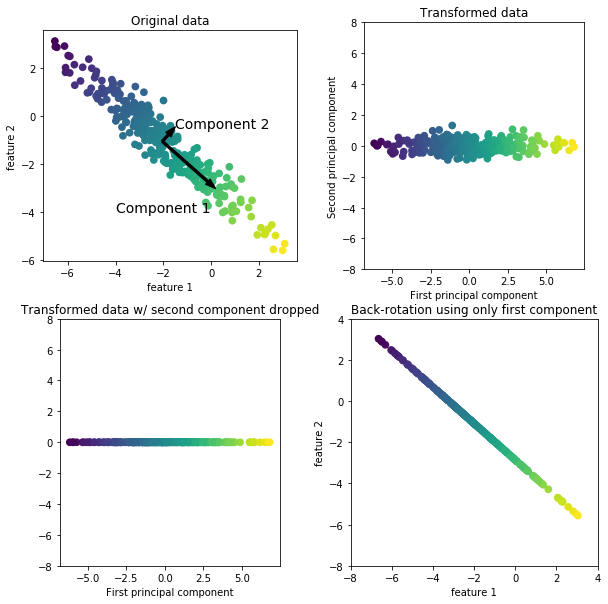

In [5]:
# ¿Qués hace PCA?
mglearn.plots.plot_pca_illustration()

# 1. Encuentre el eje para el componente 1 y el 2 (el C1 es el eje de mayor varianza y el C2 es ortogonal al eje del C1)
# 2. Rota la data horizontal, restando el promedio a cada dato, centrando el set de datos en el eje 0
# 3. Grafica una línea recta, donde el eje horizontal es el componente 1 y el 2do eje serían las características de la gráfica 1
# 4. Le suma al promdio restado para hacer la rotación.
# Concluyendo con una gráfica que tiene la misma dirección a la data original, la diferencia es que no hay tanto ruido

In [27]:
# Cargamos los datos
cancer = load_breast_cancer()
# Mostrar los nombres de las características
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer.feature_names.shape

(30,)

In [8]:
pca = PCA(n_components=2) # 2 componentes = 2 dimensiones (mediciones vs características)
pca.fit(cancer.data) # Para entrenar el PCA con los datos

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# Para transformar los datos
transformada = pca.transform(cancer.data)

In [10]:
print(cancer.data.shape)
print(transformada.shape)

(569, 30)
(569, 2)


Text(0, 0.5, 'PCA 2')

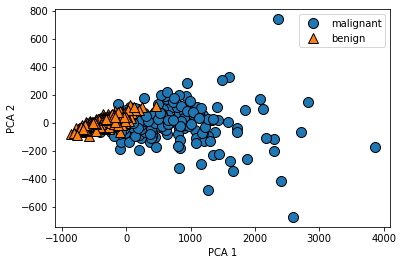

In [11]:
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Se puede visualizar una abstracción de los datos. En el que se refleja un comportamiento en la información. Todos los tumores benignos se agrupan a la izquierda, y gran parte de los tumores malignos al lado derecho.

Text(0, 0.5, 'PCA 2')

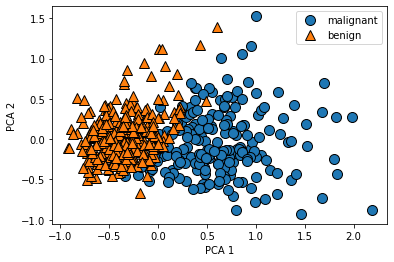

In [12]:
# Las mediciones de los datos, se transforman a una escala similar en el rango 0-1.
# Ayuda a no estar manejando valores muy pequeños contra valores muy grandes
from sklearn.preprocessing import MinMaxScaler

escala = MinMaxScaler()
escala.fit(cancer.data)
escalada = escala.transform(cancer.data)

pca.fit(escalada)
transformada = pca.transform(escalada)

mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Es la misma data, pero escalada en rangos menores. Y se pueden vizualizar mejor las correlaciones antes observadas. En este sentido se puede decir que esta data si nos sirve para hacer predicciones; y que si a un algoritmo lo alimentamos con la data original o con la data ya transformada con PCA, en el caso del entrenamiento.

In [14]:
cancer.data # Ver la data no escalada, rangos de diferentes escalas

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [13]:
escalada # Ver la data escalada los valores en rango 0-1

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

## Caso Cluster de palabras

Descarga de lista de palabras, <a href="https://www.enchantedlearning.com/wordlist/">aquí</a>
<ul>
    <li>Food</li>
    <li>Sports</li>
    <li>Weather</li>
</ul>

In [90]:
import numpy as np
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
with open('words/food_words.txt', 'r') as infile:
    food_words = infile.readlines()
with open('words/sports_words.txt', 'r') as infile:
    sports_words = infile.readlines()
with open('words/weather_words.txt', 'r') as infile:
    weather_words = infile.readlines()
    
def getWordVecs(words, model):
    vecs = []
    for word in words:
        word = word.replace('\n', '')
        try:
            vecs.append(model[word].reshape((1,300)))
        except KeyError:
            continue
    vecs = np.concatenate(vecs)
    return vecs

food_w2v = getWordVecs(food_words, word2v_model)
sports_w2v = getWordVecs(sports_words, word2v_model)
weather_w2v = getWordVecs(weather_words, word2v_model)

food_ftt = getWordVecs(food_words, ftt_model)
sports_ftt = getWordVecs(sports_words, ftt_model)
weather_ftt = getWordVecs(weather_words, ftt_model)

### Visualización de clusters
#### word2vec

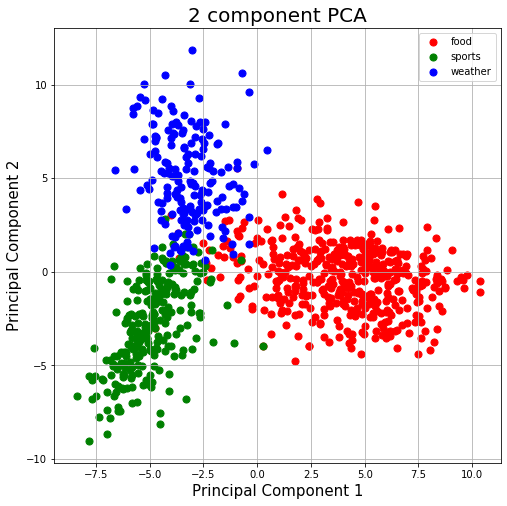

In [96]:
df = DataFrame( np.concatenate((food_w2v, sports_w2v, weather_w2v)) )

# normalizamos los datos
x = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(
    data = principalComponents,
    columns = ['principal component 1', 'principal component 2']
)
target =  DataFrame(
    data = ['food']*len(food_w2v) + ['sports']*len(sports_w2v) + ['weather']*len(weather_w2v),
    columns = ['target']
)
finalDf = pd.concat([principalDf, target], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['food', 'sports', 'weather']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, 'principal component 1'],
        finalDf.loc[indicesToKeep, 'principal component 2'],
        c = color,
        s = 50
    )
ax.legend(targets)
ax.grid()

### Visualización de clusters
#### fasttext

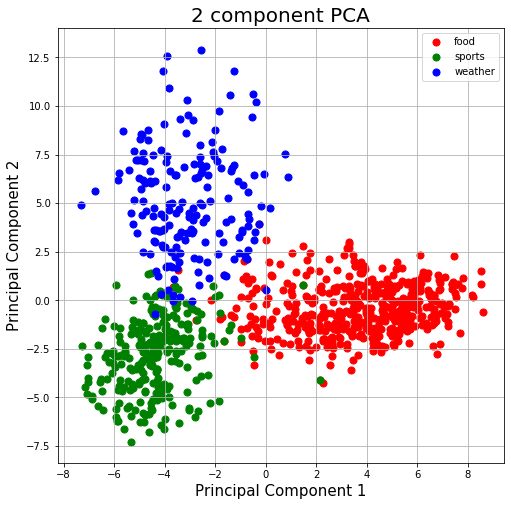

In [93]:
df = DataFrame( np.concatenate((food_ftt, sports_ftt, weather_ftt)) )

# normalizamos los datos
x = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(
    data = principalComponents,
    columns = ['principal component 1', 'principal component 2']
)
target =  DataFrame(
    data = ['food']*len(food_ftt) + ['sports']*len(sports_ftt) + ['weather']*len(weather_ftt),
    columns = ['target']
)
finalDf = pd.concat([principalDf, target], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['food', 'sports', 'weather']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, 'principal component 1'],
        finalDf.loc[indicesToKeep, 'principal component 2'],
        c = color,
        s = 50
    )
ax.legend(targets)
ax.grid()

### Estudiar Caso de Estudio: alquiler de vivienda

<p>Imaginemos que queremos predecir los precios de alquiler de vivienda del mercado. Al recopilar información de diversas fuentes tendremos en cuenta variables como tipo de vivienda, tamaño de vivienda, antigüedad, servicios, habitaciones, con/sin jardín, con/sin piscina, con/sin muebles  pero también podemos tener en cuenta la distancia al centro, si hay colegio en las cercanías, o supermercados, si es un entorno ruidoso, si tiene autopistas en las cercanías, la “seguridad del barrio”, si se aceptan mascotas, tiene wifi, tiene garaje, trastero… y seguir y seguir sumando variables.</p>
<p>Utilizaremos un archivo csv de entrada, en el cual decidíamos si convenía alquilar o comprar casa dadas 9 dimensiones. En este ejemplo:</p>
<ul>
    <li>normalizamos los datos de entrada,</li>
    <li>aplicamos PCA</li>
    <li>y veremos que con 5 de las nuevas dimensiones (y descartando 4) obtendremos</li>
    <ul>
        <li>hasta un 85% de variación y</li>
        <li>buenas predicciones.</li>
    </ul>
    <li>Realizaremos 2 gráficas:</li>
    <ul>
        <li>una con el acumulado de variabilidad explicada y</li>
        <li>una gráfica 2D, en donde el eje X e Y serán los 2 primero componentes principales obtenidos por PCA.</li>
    </ul>
</ul>

<p>Y veremos cómo los resultados “comprar ó alquilar” tienen bastante buena separación en 2 dimensiones.</p>

     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
192      4653            1024         447           703    16952    392957   
193      3390             881         194           584    34601    304112   
194      2969             623          72           620    29663    289205   
195      4169            1292          48           333    28503    239872   
196      4054            1095         371           440    22183    223971   
197      3831             690         352           488    10723    363120   
198      3961            1030         270           475    21880    280421   
199      3184             955         276           684    35565    388025   
200      3334             867         369           652    19985    376892   
201      3988            1157         105           382    11980    257580   

     estado_civil  hijos  trabajo  comprar  
192             0      0        3        0  
193             2      2        5        0  
194   

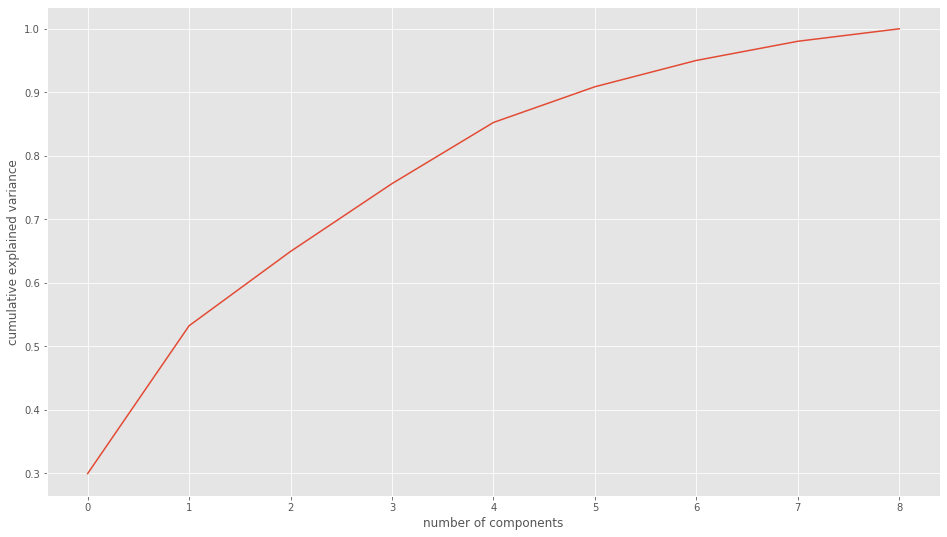

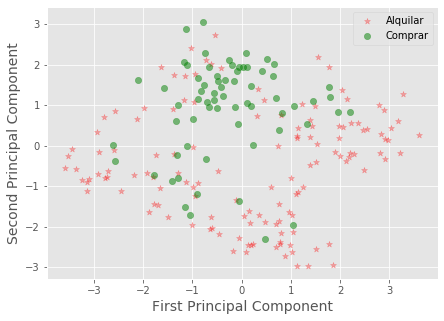

In [18]:
# Ejercicios tomado de https://www.aprendemachinelearning.com/comprende-principal-component-analysis/

# importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
# cargamos los datos de entrada
dataframe = pd.read_csv(r"comprar_alquilar.csv")
print(dataframe.tail(10))
 
# normalizamos los datos
scaler = StandardScaler()
df = dataframe.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled = scaler.transform(df)# Ahora si, escalo los datos y los normalizo
 
# Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
 
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
 
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()